<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/Feature-extraction-with-Shap/LSTM_Shap-values_Pearson_correlation_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)

In [0]:
# Importing essentials
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Load data
dataset = pd.read_csv('Shap values_LSTM_-learner col.csv')

In [4]:
# Display all data
dataset.head(56)

,Tnfaip3,Chchd7,Gnas,Pld4,Rasa1,Dapp1,Mtpap,Ttc3,Stk38,Ets1,Rars2,Wdr43,Bin1,Brox,Ddx50,Kdm7a,Mapk9,Ms4a6b,Zfp639,Celf2,Setdb2,2310001H17Rik,Umps,Tcrg-C4,Ptcd3,Ets1.1,Wac,Tvp23b,Usp15
0,-0.002510,-0.002270,-0.000149,0.001270,-8.500000e-05,0.000796,0.03970,0.001010,-0.000606,0.002390,0.002290,-0.002980,-0.001010,-0.002090,0.000644,0.02160,-0.000025,-0.000025,0.002780,-0.003220,-0.002460,0.027700,-0.000198,0.000005,0.000442,0.000216,-0.002320,-0.003350,-0.005060
1,-0.000320,-0.000443,-0.000164,0.001030,6.560000e-05,0.000362,0.04330,0.000925,0.000435,0.003690,0.002030,-0.012500,0.001040,-0.001830,-0.000059,0.01090,-0.001090,0.001350,0.005390,0.010600,0.021500,-0.027900,0.002340,-0.000718,-0.000132,-0.009420,0.007640,-0.005580,0.021500
2,0.002300,-0.018200,-0.000093,-0.001110,-1.370000e-04,0.001230,0.01190,0.005890,-0.002180,-0.003150,0.002010,0.001960,-0.001370,-0.004870,-0.001170,-0.02780,-0.001970,0.002060,0.006720,0.013200,0.028400,-0.057700,0.001990,-0.001540,-0.005960,-0.018200,0.008560,-0.012300,0.033100
3,-0.002650,0.002630,-0.000375,0.000666,8.700000e-05,0.000901,-0.02440,-0.022500,-0.000952,0.000667,0.002160,0.002810,0.000145,0.002250,0.000083,0.02350,0.000067,-0.000472,-0.006780,-0.001310,-0.004540,0.015000,0.000182,-0.001600,0.000384,-0.000603,-0.000978,0.002510,-0.004800
4,-0.003340,-0.002630,-0.000231,0.001280,1.090000e-04,-0.001590,0.01070,-0.000522,0.001000,0.002280,0.002690,-0.017900,0.001740,0.000304,-0.000368,0.02100,-0.000808,0.000613,0.004350,-0.001820,0.000392,0.003470,0.000216,-0.001330,0.002150,-0.001150,-0.001340,0.004580,-0.001620
5,-0.000518,0.008970,0.000035,0.001220,2.150000e-04,-0.000388,0.03230,0.005870,0.003050,0.003210,0.002210,-0.010800,0.000822,0.000150,0.000670,0.00955,0.000519,0.000579,0.003190,-0.003210,0.001870,0.026700,-0.000348,-0.001090,0.000529,-0.001840,-0.000588,0.003730,-0.002820
6,-0.001460,0.015700,0.000373,0.000656,-2.260000e-04,-0.000159,-0.02260,0.005810,-0.002180,0.000776,0.001900,-0.019800,-0.001180,0.001980,0.000622,-0.02650,0.000105,0.000577,0.005770,-0.001970,-0.013100,0.013600,-0.000751,0.001370,-0.001460,-0.005110,-0.001620,-0.005980,-0.003900
7,0.002150,-0.016800,-0.000053,-0.001480,-3.260000e-04,-0.000700,-0.02220,0.005330,-0.002010,-0.002920,0.001810,-0.008330,-0.000286,-0.000046,-0.000824,-0.02570,-0.001620,0.001980,0.006250,0.011900,0.026100,-0.053200,0.001600,-0.001400,-0.005680,-0.016700,0.008190,-0.011300,0.030300
8,0.002190,0.004700,-0.000460,0.000657,-2.000000e-04,-0.000856,-0.02310,0.000687,0.000545,0.000429,0.001990,-0.011300,-0.001220,-0.001840,0.000127,-0.01190,0.000407,0.000318,0.003370,-0.002050,0.003070,-0.006340,-0.000092,-0.001490,-0.000789,-0.002090,0.000658,0.002340,-0.003200
9,0.001820,0.012100,-0.000422,0.001420,5.800000e-04,0.000438,0.04230,-0.012700,0.000766,0.002140,0.001970,-0.009890,0.000194,0.001660,0.000810,0.02670,0.000040,-0.000126,0.003540,-0.002750,-0.013700,0.026400,0.000512,-0.000875,-0.000851,-0.001710,-0.003790,-0.004560,0.003230


In [5]:
# Describe the data; 56 samples, range of 0 to 1 (not z-scored)
dataset.describe()

,Tnfaip3,Chchd7,Gnas,Pld4,Rasa1,Dapp1,Mtpap,Ttc3,Stk38,Ets1,Rars2,Wdr43,Bin1,Brox,Ddx50,Kdm7a,Mapk9,Ms4a6b,Zfp639,Celf2,Setdb2,2310001H17Rik,Umps,Tcrg-C4,Ptcd3,Ets1.1,Wac,Tvp23b,Usp15
count,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,56.000000
mean,2.535714e-07,-0.000002,2.535714e-08,1.982143e-07,8.689286e-08,-3.571429e-09,0.000002,-9.293161e-20,2.446429e-07,6.875000e-07,-1.303571e-07,8.214286e-07,-2.678571e-07,1.607143e-07,2.000000e-07,0.000003,9.428571e-08,-1.160714e-07,-1.607143e-07,9.642857e-07,7.321429e-07,-0.000007,1.582143e-07,4.107143e-09,2.500000e-07,-0.000001,3.589286e-07,2.446429e-07,0.000002
std,2.828109e-03,0.012648,4.153256e-04,2.144101e-03,2.670659e-04,2.757611e-03,0.026522,9.496353e-03,3.680631e-03,3.147701e-03,3.583937e-03,1.330805e-02,1.587225e-03,2.424804e-03,1.071682e-03,0.023119,8.051563e-04,1.308562e-03,5.537112e-03,5.408511e-03,1.487499e-02,0.030179,9.601229e-04,2.129044e-03,2.428862e-03,0.007618,3.702347e-03,5.446381e-03,0.013471
min,-7.700000e-03,-0.018200,-6.240000e-04,-9.680000e-03,-3.260000e-04,-1.190000e-02,-0.024800,-3.620000e-02,-2.740000e-03,-3.200000e-03,-1.370000e-02,-3.980000e-02,-1.400000e-03,-8.250000e-03,-4.370000e-03,-0.027900,-2.360000e-03,-1.860000e-03,-6.850000e-03,-4.360000e-03,-1.660000e-02,-0.062900,-1.330000e-03,-1.700000e-03,-6.100000e-03,-0.019800,-3.790000e-03,-1.330000e-02,-0.013300
25%,-1.820000e-03,-0.007970,-3.630000e-04,-4.392500e-04,-1.622500e-04,-7.050000e-04,-0.019275,-2.027500e-03,-2.157500e-03,-1.962500e-03,-1.212500e-03,-8.720000e-03,-1.132500e-03,-1.195000e-03,-2.597500e-04,-0.025725,-5.410000e-05,-1.362500e-03,-6.122500e-03,-3.230000e-03,-1.370000e-02,-0.026475,-6.232500e-04,-1.402500e-03,-8.045000e-04,-0.001902,-2.325000e-03,-1.325000e-03,-0.008130
50%,1.915000e-03,-0.002250,-7.595000e-05,5.985000e-04,-6.100000e-05,7.320000e-04,-0.012800,2.655000e-03,-9.610000e-04,-1.100000e-03,1.875000e-03,4.950000e-03,-6.475000e-04,3.895000e-04,3.250000e-04,0.000900,3.090000e-04,7.175000e-05,3.050000e-03,-1.950000e-03,-1.369000e-03,0.010200,-3.350000e-04,-1.230000e-03,6.545000e-04,0.001405,-1.155000e-03,2.305000e-03,-0.004550
75%,2.140000e-03,0.005490,3.272500e-04,1.232500e-03,5.125000e-05,1.460000e-03,0.013400,6.240000e-03,4.625000e-04,1.245000e-03,2.222500e-03,1.130000e-02,5.522500e-04,1.895000e-03,6.552500e-04,0.015950,4.870000e-04,1.005000e-03,5.095000e-03,-9.327500e-04,9.735000e-03,0.026900,1.905000e-04,1.557500e-03,2.087500e-03,0.005352,3.587500e-04,4.252500e-03,0.000915
max,2.370000e-03,0.040400,9.650000e-04,1.550000e-03,1.220000e-03,2.100000e-03,0.080800,7.970000e-03,1.580000e-02,1.130000e-02,2.780000e-03,1.380000e-02,5.320000e-03,2.320000e-03,8.200000e-04,0.053400,9.070000e-04,2.130000e-03,7.290000e-03,1.480000e-02,3.110000e-02,0.032800,2.510000e-03,6.770000e-03,2.420000e-03,0.008790,9.110000e-03,5.080000e-03,0.036400


In [0]:
# Set Seaborn Style defaults
sns.set(style = 'ticks', font= 'sans-serif', font_scale=1.25)

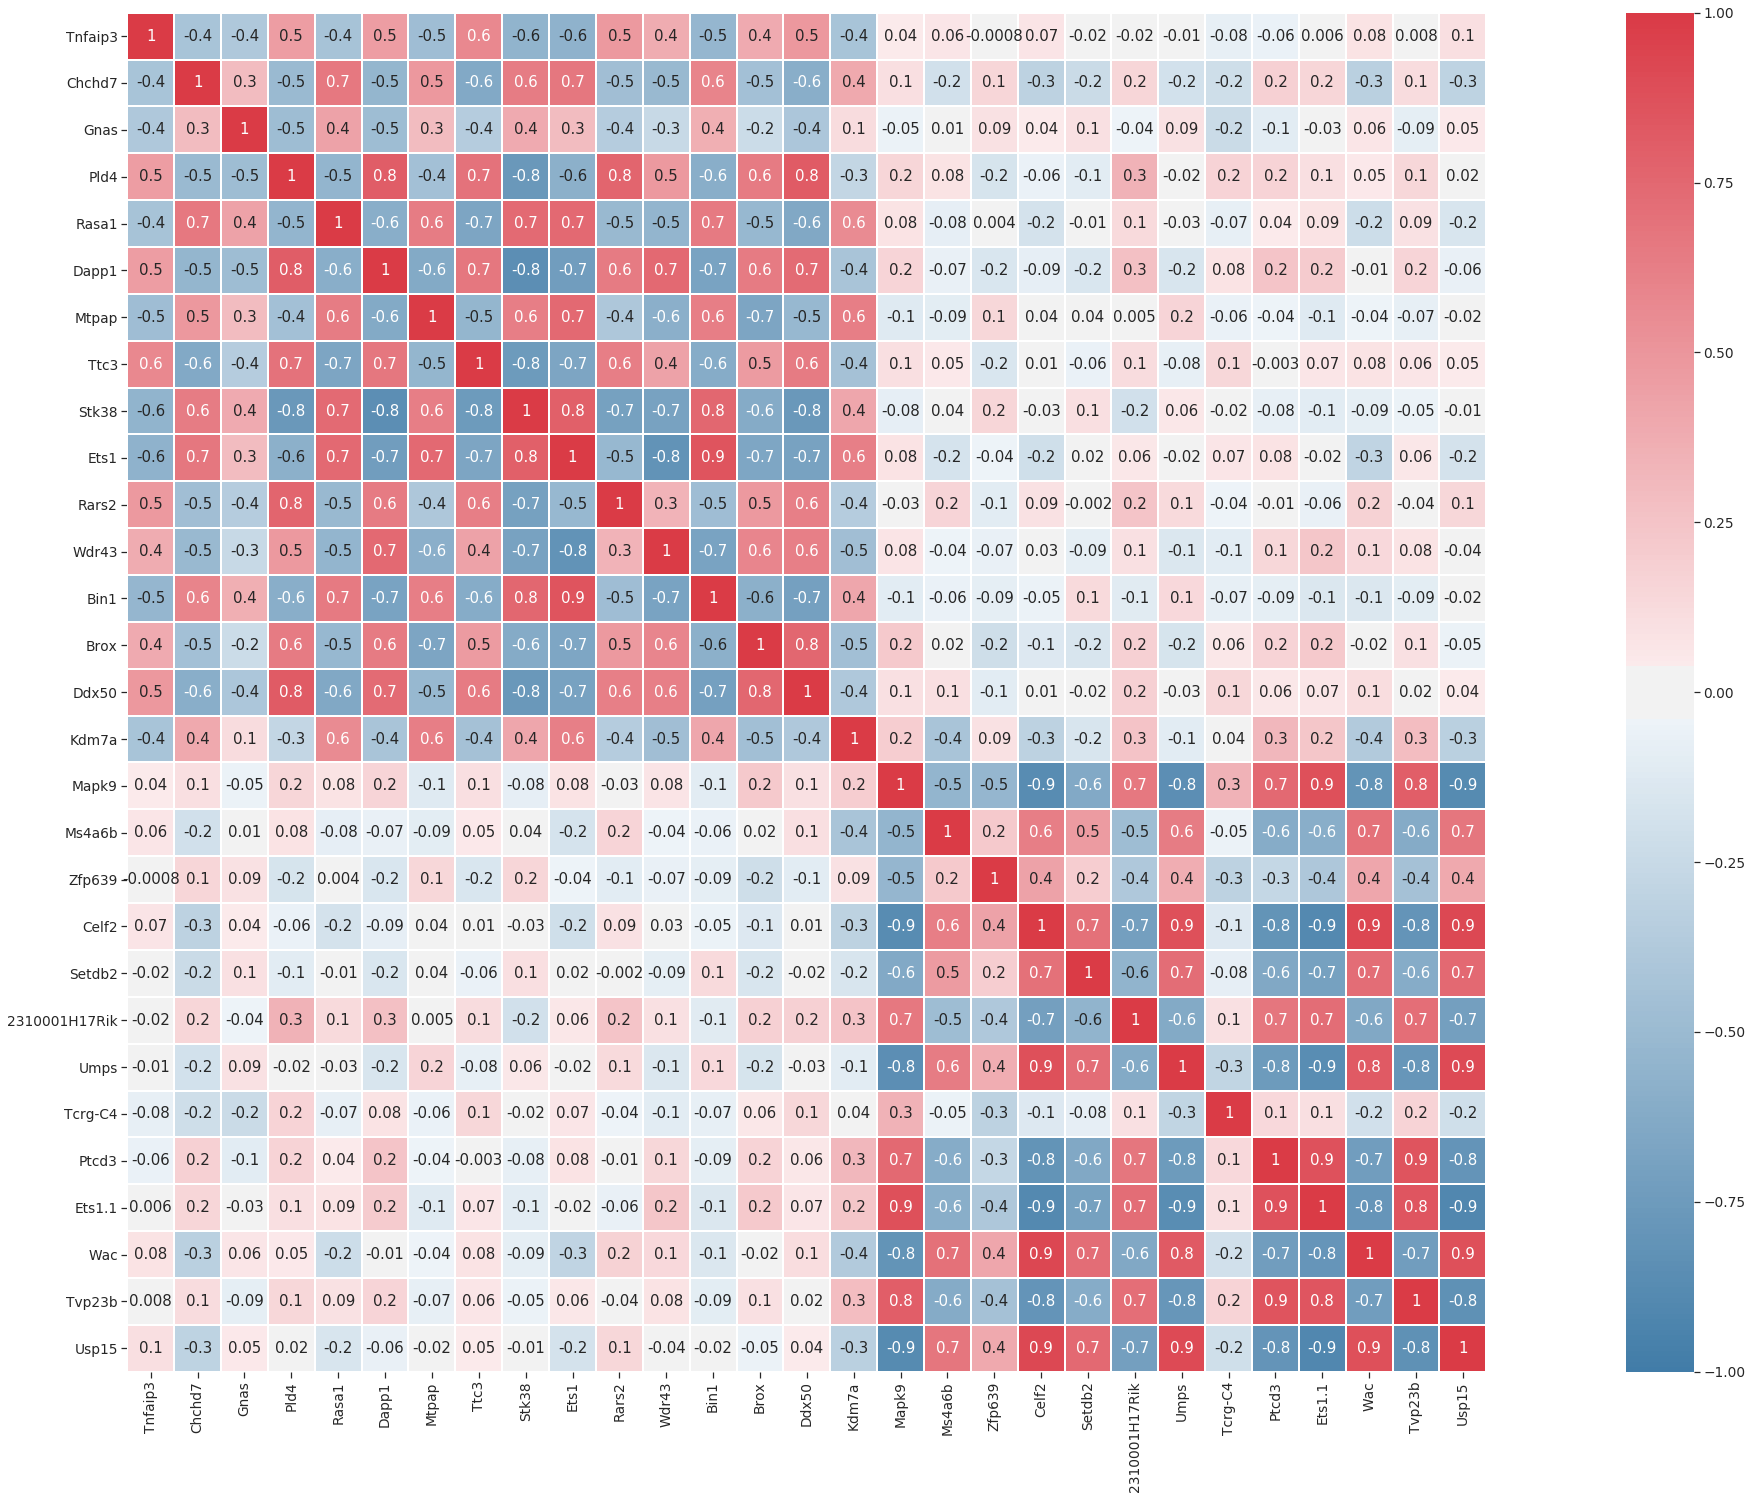

In [7]:
# Pearson Correlation of columns
corr = dataset.corr(method='pearson')

#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(50,25))

# Mask the mirror image across the diagonal
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Specify colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plotting the heatmap without the mask, correct aspect ratio and the etire range of Pearson's correlation (-1 to +1)
sns.heatmap(corr, linewidths=1, linecolor = 'white', cmap=cmap, center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink':1}, annot = True, fmt='0.1g' )

#Save figure as svg
plt.savefig ('pearson-correlation_shap_LSTM.svg', format = 'svg')

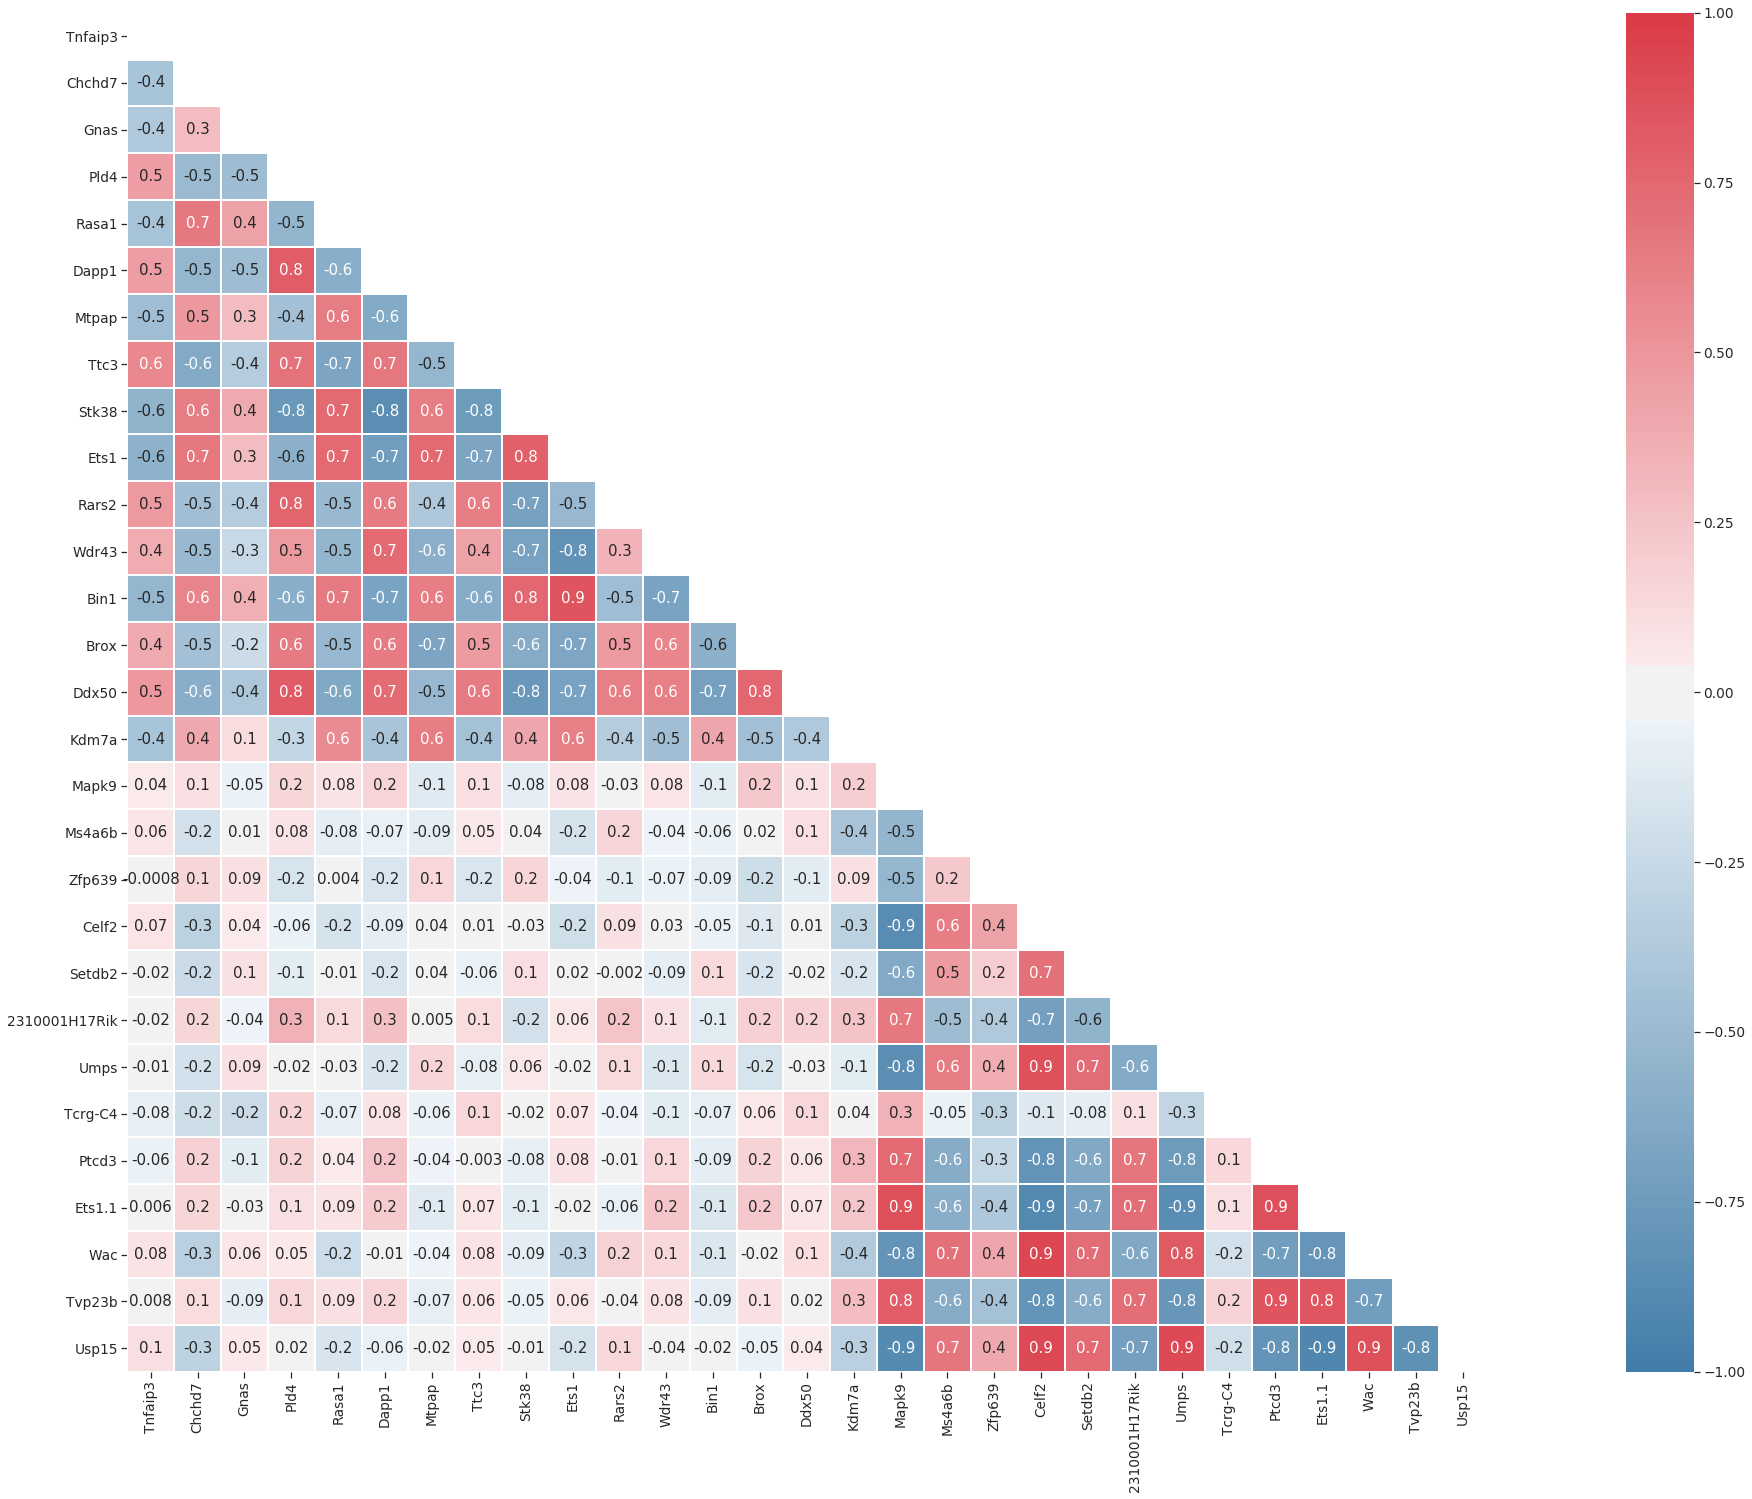

In [8]:
# Plotting the half-diagonal heatmap (with mask)
f,ax = plt.subplots(figsize=(50,25))
sns.heatmap(corr, linewidths=1, linecolor = 'white', mask=mask, cmap=cmap, center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink':1}, annot = True, fmt='0.1g')

#Save figure as svg
plt.savefig ('pearson-correlation_shap_LSTM_half diagonal.svg', format = 'svg')

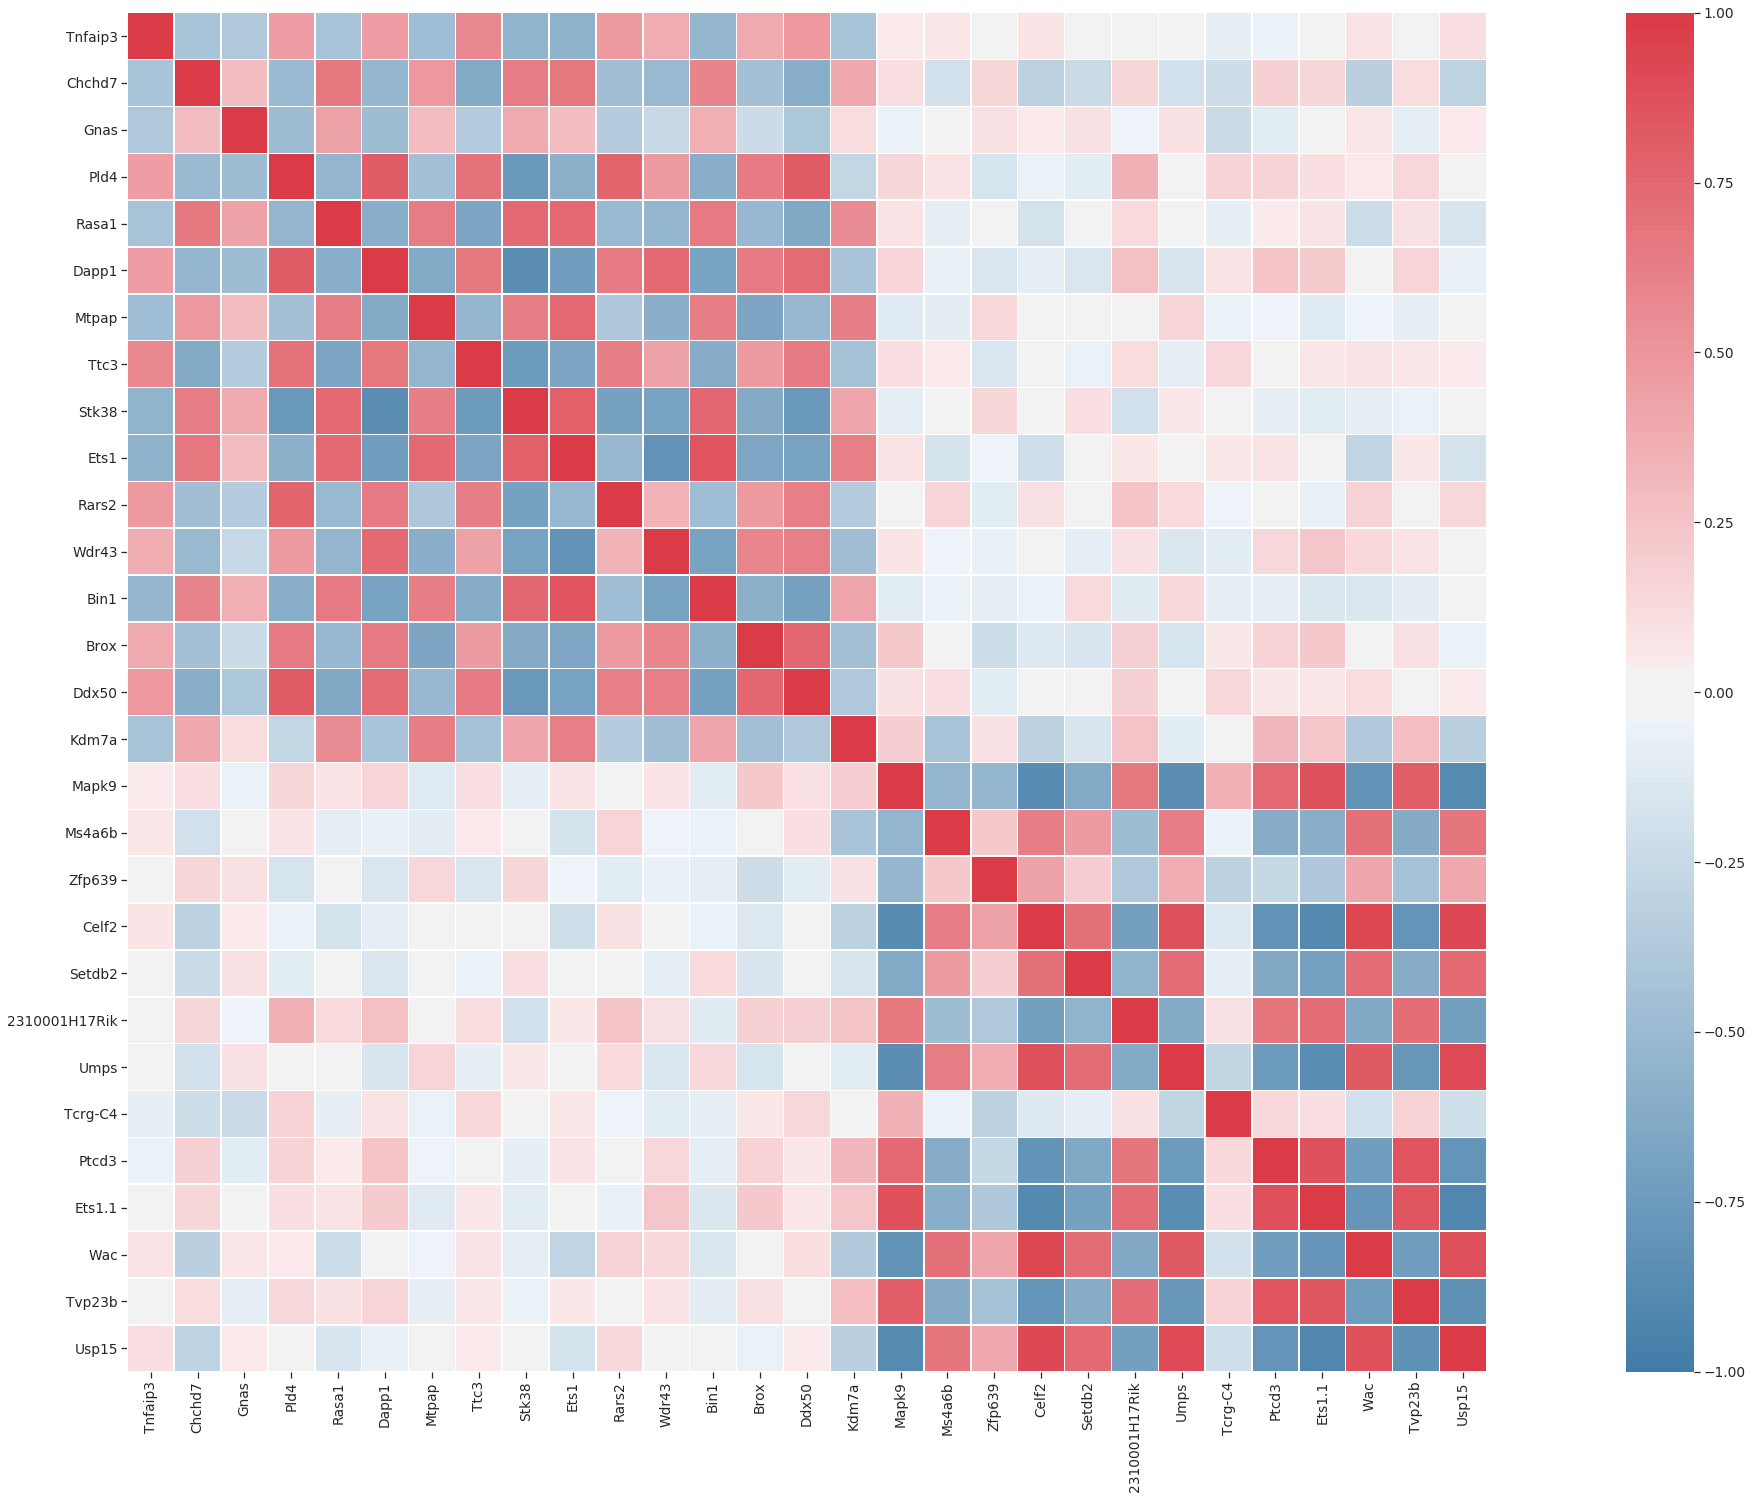

In [9]:
#No annotations inside cells

#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(50,25))

# Mask the mirror image across the diagonal
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Specify colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plotting the heatmap without the mask, correct aspect ratio and the etire range of Pearson's correlation (-1 to +1)
sns.heatmap(corr, linewidths=0.5, linecolor = 'white', cmap=cmap, center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink':1})

#Save figure as svg
plt.savefig ('pearson-correlation_shap_LSTM_no annot.svg', format = 'svg')

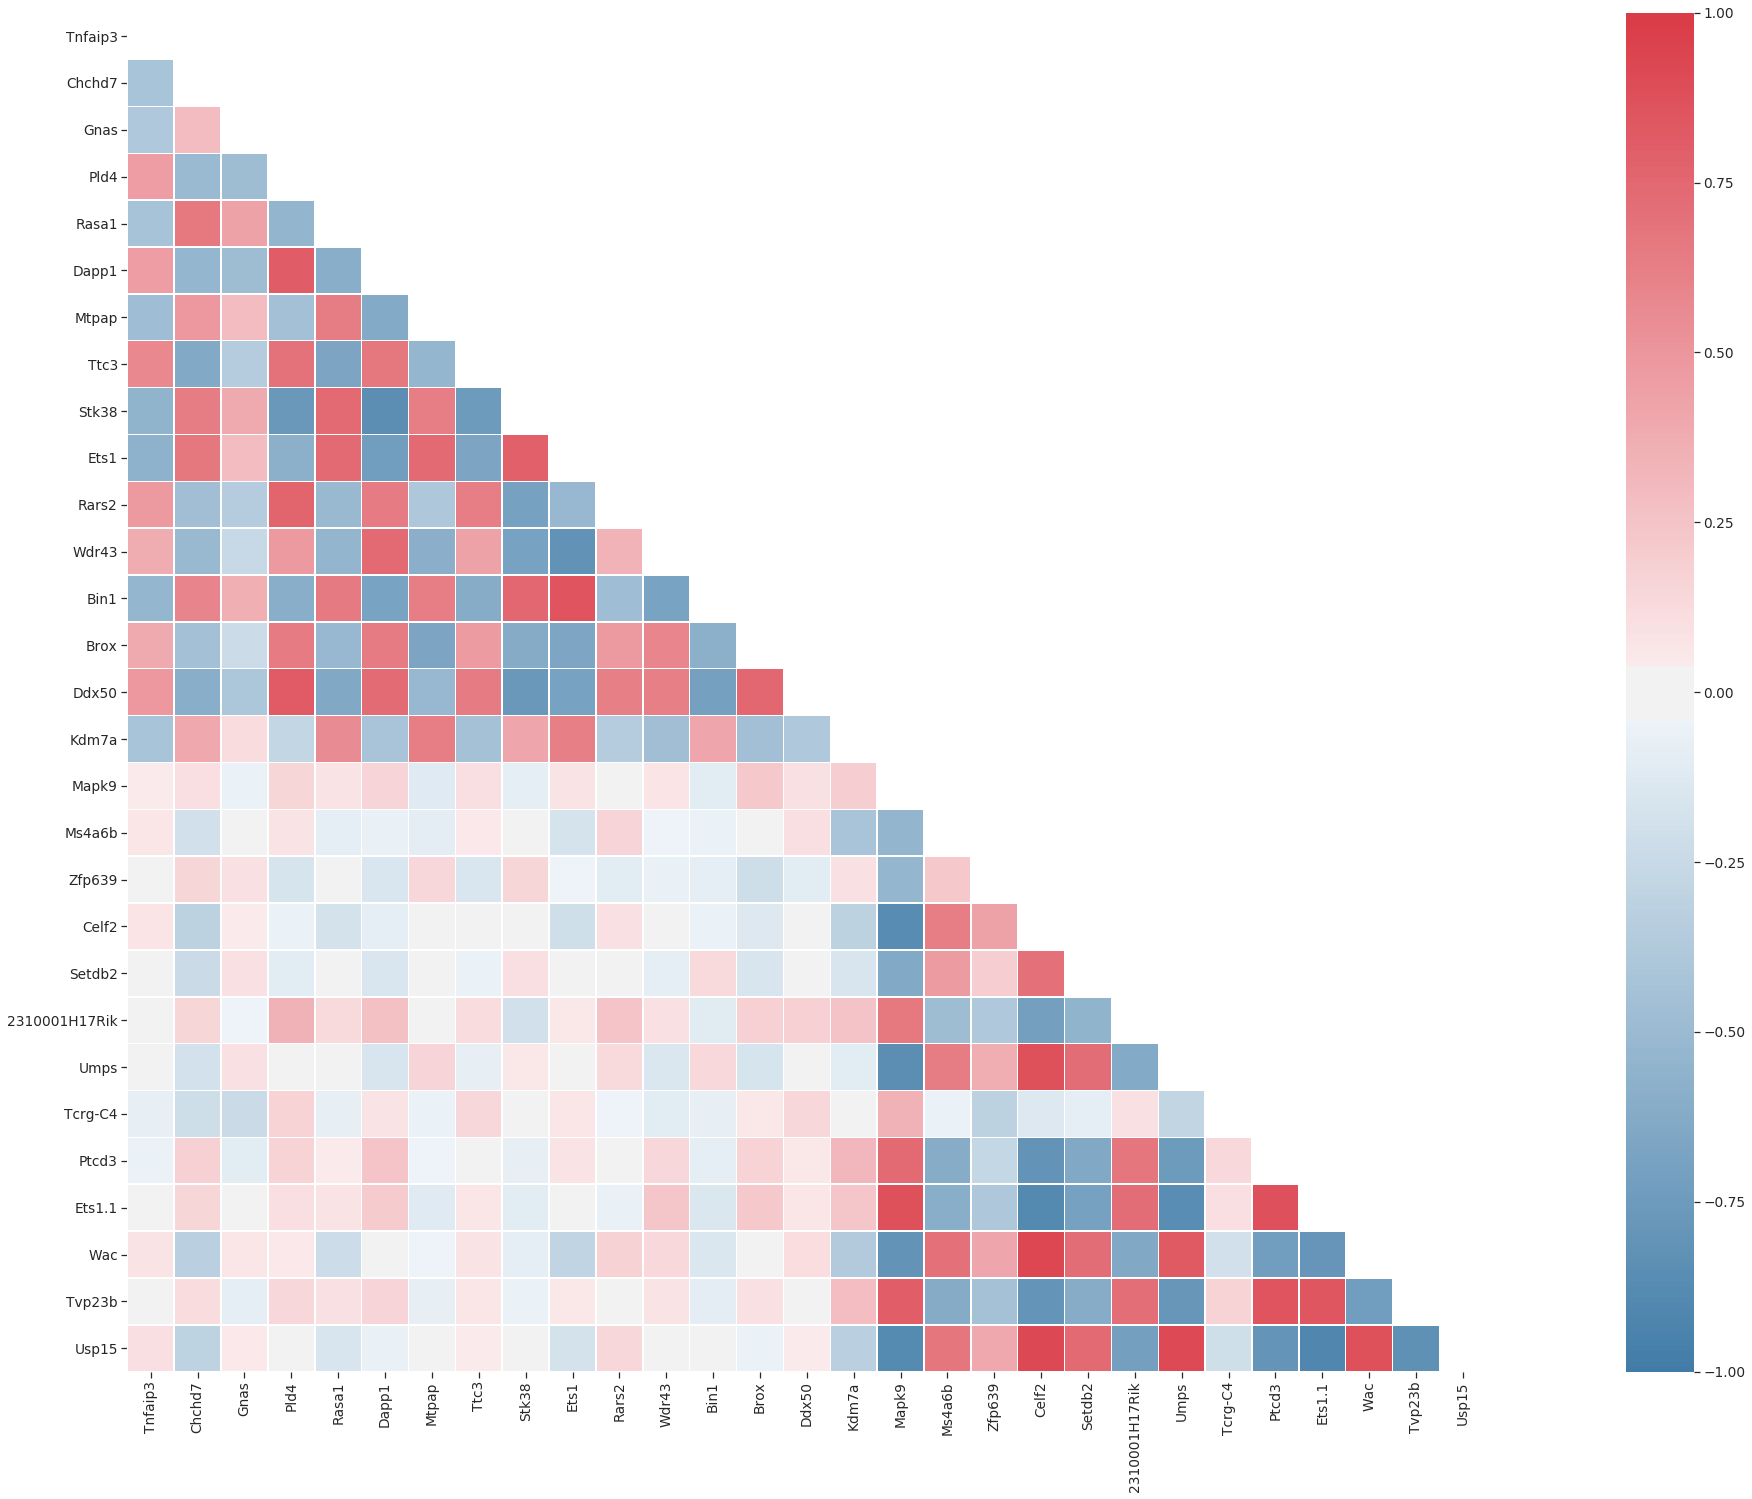

In [10]:
# Plotting the half-diagonal heatmap (with mask & no annotations))
f,ax = plt.subplots(figsize=(50,25))
sns.heatmap(corr, linewidths=0.5, mask=mask, cmap=cmap, center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink':1})

#Save figure as svg
plt.savefig ('pearson-correlation_shap_LSTM_half-diagonal_no annot.svg', format = 'svg')